In [1]:
import nltk, re, pprint
from nltk import word_tokenize
#nltk.download("punkt")
from plotnine import *

/Users/davidguo/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [285]:
ehr=open("ehr.txt", "r").read()
medhelp=open("medhelp.txt", "r").read()

In [286]:
e_tokens=word_tokenize(ehr)
m_tokens=word_tokenize(medhelp)
stopwords=open("stoplist.txt").read().splitlines()

In [287]:
stopwords_cap=[]
for word in stopwords:
    stopwords_cap.append(word.capitalize())

In [288]:
#https://stackoverflow.com/questions/4211209/remove-all-the-elements-that-occur-in-one-list-from-another
e_tokens_nopunct=[x for x in e_tokens if x not in [".",",",":","(",")","[","]","{","}",
                                                   "/",";", "?", "!", "|"]] #remove stand-alone punctuation
e_tokens_nopunct=[x for x in e_tokens_nopunct if x not in ["==================", "////", "**", "--", "``","''",]] #after doing second search

e_tokens_new=[x for x in e_tokens_nopunct if x not in stopwords] #remove lowercase stopwords
e_tokens_new=[x for x in e_tokens_new if x not in stopwords_cap] #remove uppercase stopwords

len(e_tokens_new)

7592

In [289]:
m_tokens_nopunct=[x for x in m_tokens if x not in [".",",",":","(",")","[","]","{","}",
                                                   "/",";", "?", "!", "|"]] #remove stand-alone punctuation

m_tokens_new=[x for x in m_tokens_nopunct if x not in stopwords] #remove lowercase stopwords
m_tokens_new=[x for x in m_tokens_new if x not in stopwords_cap] #remove uppercase stopwords

len(m_tokens_new)

7249

In [290]:
#find elements with punctuation
e_tokens_unique=set(e_tokens_new)
e_token_freq=[]
for word in e_tokens_unique:
    e_token_freq.append(e_tokens.count(word))

In [291]:
m_tokens_unique=set(m_tokens_new)
m_token_freq=[]
for word in m_tokens_unique:
    m_token_freq.append(m_tokens.count(word))

In [292]:
import pandas

e_table = pandas.DataFrame([list(e_tokens_unique), 
                            e_token_freq])
e_table=e_table.transpose()
e_table.columns=["word","freq"]
e_table=e_table.sort_values("freq", ascending=False)

In [293]:
m_table = pandas.DataFrame([list(m_tokens_unique), 
                            m_token_freq])
m_table=m_table.transpose()
m_table.columns=["word","freq"]
m_table=m_table.sort_values("freq", ascending=False)
#with pandas.option_context('display.max_rows', None, 'display.max_columns', 3):
    #print(m_table)

In [300]:
e_prop=pandas.value_counts(e_table["freq"])/len(e_tokens_unique)
e_freq=sorted(list(set(e_table["freq"])))

m_prop=pandas.value_counts(m_table["freq"])/len(m_tokens_unique)
m_freq=sorted(list(set(m_table["freq"])))

In [301]:
import numpy
e_fin=pandas.DataFrame(dict(freq=e_freq, prop=e_prop))
e_fin["file"]=["e"]*len(e_fin)

In [302]:
m_fin=pandas.DataFrame(dict(freq=m_freq, prop=m_prop))
m_fin["file"]=["m"]*len(m_fin)

In [303]:
fin=pandas.concat([e_fin,m_fin])

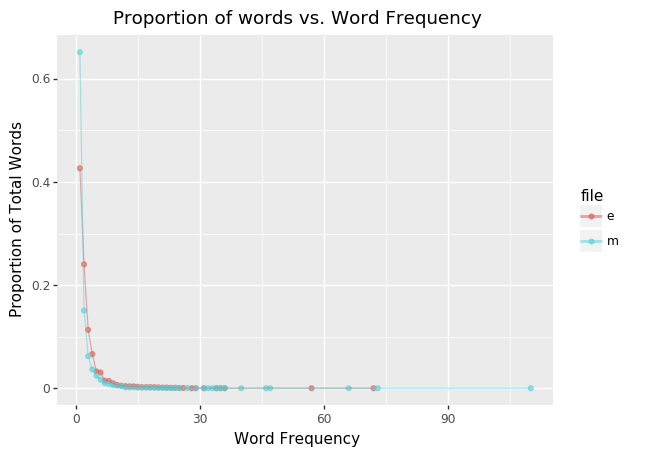

<ggplot: (308922509)>

In [304]:
ggplot(aes(x="freq",y="prop", color="file"),data=fin) + geom_point(alpha=0.6) +\
geom_line(alpha=0.5) + ggtitle("Proportion of words vs. Word Frequency") +labs(x="Word Frequency", y="Proportion of Total Words")

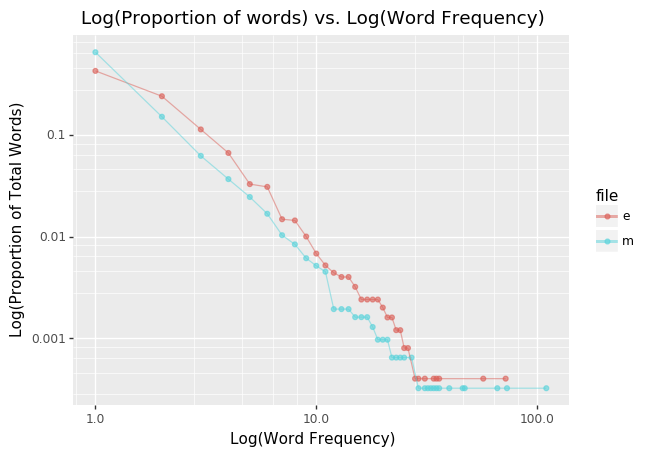

<ggplot: (-9223372036552458457)>

In [299]:
ggplot(aes(x="freq",y="prop", color="file"),data=fin) + geom_point(alpha=0.6) + geom_line(alpha=0.5) + scale_y_log10() + scale_x_log10() +\
ggtitle("Log(Proportion of words) vs. Log(Word Frequency)") + \
labs(x="Log(Word Frequency)", y="Log(Proportion of Total Words)")

In [576]:
####3.2
#nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/davidguo/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [187]:
#e_tokens_nopunct
e_check_stop=[]
for word in e_tokens_nopunct:
    e_check_stop.append(word.lower())
    
m_check_stop=[]
for word in m_tokens_nopunct:
    m_check_stop.append(word.lower())

In [188]:
e_check_stop=[x for x in e_tokens_nopunct if x in stopwords] #keep lowercase stopwords
m_check_stop=[x for x in m_tokens_nopunct if x in stopwords] #keep lowercase stopwords

In [189]:
#3.2a
len(e_check_stop)/len(e_tokens_nopunct)
len(set(e_check_stop))/len(set(e_tokens_nopunct))

0.054667162513945704

In [190]:
len(m_check_stop)/len(m_tokens_nopunct)

0.5065155463967513

In [191]:
len(set(m_check_stop))/len(set(m_tokens_nopunct))

0.07066007560337308

In [192]:
#https://stackoverflow.com/questions/34214139/python-keep-only-letters-in-string
e_only_letters=''.join(x for x in ehr if x.isalpha())
m_only_letters=''.join(x for x in medhelp if x.isalpha())

In [193]:
e_only_cap=''.join(c for c in e_only_letters if c.isupper())
m_only_cap=''.join(c for c in m_only_letters if c.isupper())

In [194]:
len(e_only_cap)/len(e_only_letters)

0.06761880687563195

In [195]:
len(m_only_cap)/len(m_only_letters)

0.03459214047325536

In [196]:
numpy.mean(e_table["freq"])

3.0428857715430864

In [197]:
len(e_table["word"])

2495

In [198]:
totlen=0
for i in e_tokens_new:
    totlen+=len(i)

In [199]:
totlen/len(e_tokens_new)

6.131585879873551

In [200]:
numpy.mean(m_table["freq"])

2.33989670755326

In [202]:
totlen=0
for i in m_tokens_new:
    totlen+=len(i)

In [203]:
totlen/len(m_tokens_new)

5.586011863705338

In [213]:
#nltk.download('wordnet')
from nltk import *
e_pos=[x[1] for x in pos_tag(e_tokens_nopunct)] #include stopwords
#e_pos=[x[1] for x in pos_tag(e_tokens_new)]

In [214]:
e_pos_unique=set(e_pos)
e_pos_freq=[]
for p in e_pos_unique:
    e_pos_freq.append(e_pos.count(p))

In [215]:
e_pos_table=pandas.DataFrame([e_pos_unique, e_pos_freq]).transpose()
e_pos_table.columns=["pos","freq"]

In [220]:
e_pos_table=e_pos_table.sort_values("pos")#, ascending=False)
e_pos_table

11715

In [224]:
#m_pos=[x[1] for x in pos_tag(m_tokens_nopunct)] #include stopwords
m_pos=[x[1] for x in pos_tag(m_tokens_new)]
m_pos_unique=set(m_pos)
m_pos_freq=[]
for p in m_pos_unique:
    m_pos_freq.append(m_pos.count(p))
    m_pos_table=pandas.DataFrame([m_pos_unique, m_pos_freq]).transpose()
m_pos_table.columns=["pos","freq"]
m_pos_table=m_pos_table.sort_values("pos")#, ascending=False)
m_pos_table
#len(m_pos)

,pos,freq
5,#,1
19,$,1
15,'',35
28,:,117
33,CC,20
22,CD,228
3,DT,2
12,FW,5
32,IN,27
10,JJ,1229


In [236]:
e_tags=pos_tag(e_tokens_new)
m_tags=pos_tag(m_tokens_new)


AttributeError: 'list' object has no attribute 'stem'

In [268]:
e_tokens_v=[]
m_tokens_v=[]
for w in m_tokens_new:
    m_tokens_v.append(lemma.lemmatize(w,'v'))
for w in e_tokens_new:
    e_tokens_v.append(lemma.lemmatize(w,'v'))

In [269]:
m_vtag=pos_tag(m_tokens_v)
e_vtag=pos_tag(e_tokens_v)

In [270]:
is_noun = lambda pos: (pos[:2] == 'NN' or pos[:2]=='NNS' or pos[:2]=="NNP" or pos[:2]=="NNPS")
is_verb = lambda pos: (pos[:2] == 'MD' or pos[:2]=='VB' or pos[:2]=="VBD" or pos[:2]=="VBG" or \
                      "VBP", "VBZ")
is_adj = lambda pos: (pos[:2] == 'JJ' or pos[:2]=='JJR' or pos[:2]=="JJS")
e_nouns=[word for (word, pos) in e_tags if is_noun(pos)]
e_verbs=[word for (word, pos) in e_vtag if is_verb(pos)]
e_adj=[word for (word, pos) in e_tags if is_adj(pos)]

In [255]:
m_nouns=[word for (word, pos) in m_tags if is_noun(pos)]
m_verbs=[word for (word, pos) in m_vtag if is_verb(pos)]
m_adj=[word for (word, pos) in m_tags if is_adj(pos)]

In [229]:
from collections import Counter

In [275]:
Counter(e_nouns).most_common()[0:10]

[('pain', 65),
 ('history', 36),
 ('%', 35),
 ('home', 31),
 ('patient', 30),
 ('ED', 29),
 ('days', 29),
 ('Pt', 25),
 ('fibrillation', 25),
 ('weeks', 23)]

In [279]:
#with pandas.option_context('display.max_rows', None, 'display.max_columns', 3):
#    print(Counter(e_verbs).most_common())
Counter(e_verbs).most_common()[0:55]

[('present', 78),
 ('pain', 73),
 ('patient', 57),
 ('history', 36),
 ('%', 35),
 ('abdominal', 34),
 ('home', 31),
 ('atrial', 31),
 ('report', 31),
 ('deny', 30),
 ('show', 30),
 ('right', 29),
 ('ED', 29),
 ('days', 29),
 ('s/p', 28),
 ('give', 27),
 ('note', 26),
 ('Pt', 25),
 ('cough', 25),
 ('chest', 25),
 ('fibrillation', 25),
 ('find', 24),
 ('2', 23),
 ('back', 23),
 ('weeks', 23),
 ('worsen', 23),
 ('leave', 23),
 ('-', 23),
 ('t', 23),
 ('female', 22),
 ('woman', 22),
 ('two', 22),
 ('Patient', 22),
 ('transfer', 21),
 ('BP', 21),
 ('IV', 21),
 ('pt', 21),
 ('old', 21),
 ('blood', 20),
 ('shortness', 20),
 ('breath', 20),
 ('HR', 20),
 ('disease', 19),
 ('pulse', 19),
 ("'s", 18),
 ('admit', 18),
 ('3', 18),
 ('past', 17),
 ('CAD', 17),
 ('positive', 17),
 ('recent', 17),
 ('yo', 17),
 ('vomit', 17),
 ('elevate', 17),
 ('increase', 17)]

In [658]:
Counter(e_adj).most_common()[0:11]

[('abdominal', 34),
 ('atrial', 31),
 ('patient', 22),
 ('old', 21),
 ('positive', 17),
 ('recent', 17),
 ('right', 16),
 ('negative', 16),
 ('pulmonary', 16),
 ('chest', 15),
 ('unresponsive', 13)]

In [230]:
Counter(m_nouns).most_common()[0:10]

[('time', 47),
 ('people', 23),
 ('help', 22),
 ('weeks', 22),
 ('days', 21),
 ('things', 21),
 ('pain', 19),
 ('doctor', 18),
 ('years', 17),
 ('body', 16)]

In [657]:
Counter(m_verbs).most_common()[0:20]

[("n't", 110),
 ('...', 73),
 ("'s", 66),
 ('know', 57),
 ('time', 53),
 ('take', 52),
 ('feel', 50),
 ('test', 49),
 ('get', 47),
 ('think', 46),
 ("'m", 46),
 ('help', 41),
 ('do', 41),
 ('-', 40),
 ('go', 38),
 ('try', 36),
 ("''", 35),
 ('``', 35),
 ('make', 33),
 ('doctor', 31)]

In [232]:
Counter(m_adj).most_common()[0:10]

[('good', 27),
 ('sure', 21),
 ('normal', 17),
 ('long', 14),
 ('low', 14),
 ('hard', 14),
 ('right', 13),
 ('new', 11),
 ('bad', 11),
 ('able', 11)]

In [86]:
#3.3


In [14]:
#def functionname( parameters ):
#   "function_docstring"
#   function_suite
#   return [expression]

'transfer'

In [386]:
from nltk.stem.porter import *
ps = PorterStemmer()
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

ehr_3=ehr.lower()
tendoc=list(ehr_3.split('\n'))[0:10]
N=90
d=tendoc[0]
#ehr_3.splitlines()
#ehr_3.stem('present')
#ehr_3.lemmatize()

['7',
 '8',
 ' ',
 'm',
 ' ',
 't',
 'r',
 'a',
 'n',
 's',
 'f',
 'e',
 'r',
 'r',
 'e',
 'd',
 ' ',
 't',
 'o',
 ' ',
 'n',
 'u',
 'r',
 's',
 'i',
 'n',
 'g',
 ' ',
 'h',
 'o',
 'm',
 'e',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 'r',
 'e',
 'h',
 'a',
 'b',
 ' ',
 'a',
 'f',
 't',
 'e',
 'r',
 ' ',
 'c',
 'a',
 'b',
 'g',
 '.',
 ' ',
 'r',
 'e',
 'p',
 'o',
 'r',
 't',
 'e',
 'd',
 'l',
 'y',
 ' ',
 'r',
 'e',
 'a',
 'd',
 'm',
 'i',
 't',
 't',
 'e',
 'd',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'a',
 ' ',
 's',
 'm',
 'a',
 'l',
 'l',
 ' ',
 'n',
 'q',
 'w',
 'm',
 'i',
 '.',
 ' ',
 'y',
 'e',
 's',
 't',
 'e',
 'r',
 'd',
 'a',
 'y',
 ',',
 ' ',
 'h',
 'e',
 ' ',
 'w',
 'a',
 's',
 ' ',
 'n',
 'o',
 't',
 'e',
 'd',
 ' ',
 't',
 'o',
 ' ',
 'h',
 'a',
 'v',
 'e',
 ' ',
 'a',
 ' ',
 'm',
 'e',
 'l',
 'a',
 'n',
 'o',
 't',
 'i',
 'c',
 ' ',
 's',
 't',
 'o',
 'o',
 'l',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 't',
 'h',
 'e',
 'n',
 ' ',
 't',
 'o',
 'd',
 'a',
 'y',
 ' ',
 'h',
 'e',
 ' ',
 'h',
 'a'

dtemp=[x for x in word_tokenize(d) if x not in [".",",",":","(",")","[","]","{","}",
                                                   "/",";", "?", "!", "|"]] #remove stand-alone punctuation
dtemp=[x for x in dtemp if x not in stopwords]

dtemp[2]=ps.stem(dtemp[2])

d_freq=[]
for word in set(dtemp):
    d_freq.append(dtemp.count(word))

pandas.DataFrame([list(set(dtemp)),d_freq]).transpose()


In [345]:
import string
import os

from sklearn.feature_extraction.text import TfidfVectorizer
files=ehr_3.split('\n')

In [535]:
token_dict = {}
stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

for i in range(0, len(files)):
    text = files[i]
    token_dict[i]=text
        
token_dict

{0: '78 m transferred to nursing home for rehab after cabg. reportedly readmitted with a small nqwmi. yesterday, he was noted to have a melanotic stool and then today he had approximately 9 loose bm w/ some melena and some frank blood just prior to transfer, unclear quantity.',
 1: 'an elderly female with past medical history of hypertension, severe aortic stenosis, hyperlipidemia, and right hip arthroplasty. presents after feeling a snap of her right leg and falling to the ground. no head trauma or loss of consciousness.',
 2: 'a 75f with a pmhx significant for severe pvd, cad, dm, and ckd presented after being found down unresponsive at home. she was found to be hypoglycemic to 29 with hypotension and bradycardia.  her hypotension and confusion improved with hydration. she had a positive ua which eventually grew klebsiella. she had temp 96.3, respiratory rate 22, bp 102/26, a leukocytosis to 18 and a creatinine of 6 (baseline 2).  pt has blood cultures positive for group a streptococ

In [541]:
#this can take some time
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words=stopwords,smooth_idf=False, sublinear_tf=True)
tfs = tfidf.fit_transform(token_dict.values())

In [542]:
tfidf.get_feature_names()

['#',
 '%',
 "''",
 "'d",
 "'s",
 '(',
 ')',
 '**',
 '****see',
 '**1-13**',
 '**1-20**',
 '**1-26**',
 '**1-27**',
 '**1-31**',
 '**1-7**',
 '**10-19**',
 '**10-2**',
 '**10/3245**',
 '**11-15**',
 '**11-26**',
 '**11-28**',
 '**12-12**',
 '**12-24**',
 '**12-8**',
 '**2-13**',
 '**2-20**',
 '**2-9**',
 '**2575-8-15**',
 '**2739-2-16**',
 '**2764**',
 '**2769-1-1**',
 '**2797-1-27**',
 '**2841**',
 '**2876-4-14**',
 '**2877**',
 '**2963-11-24**',
 '**3-16**',
 '**3-23**',
 '**3120-12-11**',
 '**3154-2-15**',
 '**3243-11-10**',
 '**3243-11-11**',
 '**3266-8-26**',
 '**3294-3-6**',
 '**3301-9-5**',
 '**3420**',
 '**3421**',
 '**3423**',
 '**3426**',
 '**3432-12-27**',
 '**3433-1-11**',
 '**3435-11-28**',
 '**3436-4-2**',
 '**5-/2769**',
 '**6-12**',
 '**6-25**',
 '**7-/2899**',
 '**7-2**',
 '**96**',
 '**age',
 '**compani',
 '**doctor',
 '**first',
 '**hospit',
 '**hospital1',
 '**hospital3',
 '**hospital6',
 '**known',
 '**last',
 '**locat',
 '**month',
 '**name',
 '**name13',
 '**name

In [591]:
from scipy.sparse import coo_matrix
tendoc=tfs[0:11]

In [593]:
#tendoc[0].toarray().argsort(axis=1).tolist()
tendoc.toarray()

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [655]:
tfidf10=pandas.DataFrame(tendoc.toarray()).transpose()
tfidf10.loc[:,9].sort_values(ascending=False).head(20)

617     0.149253
867     0.149253
274     0.149253
851     0.149253
1969    0.142748
590     0.130480
831     0.130480
251     0.130480
205     0.130480
97      0.130480
2063    0.130480
351     0.130480
132     0.130480
139     0.130480
1981    0.130480
1070    0.130480
180     0.130480
1408    0.130480
1158    0.130480
941     0.130480
Name: 9, dtype: float64

In [614]:
def findtop5(top5ind):
    top5=[]
    for i in top5ind:
        top5.append(tfidf.get_feature_names()[i])
    return top5

In [656]:
findtop5([
    

617,867,274,851,
1969,
590,831,251,205,97,2063,351,132,139,1981,1070,180,1408,1158,941,1572,1098,1996,258,
1110,1718,1479,118,430,679,969,382,2075,1907,2026,
862




])

['cardiomyopathi',
 'ef',
 '55y/o',
 'dysfunct',
 'unrespons',
 'bun',
 'done',
 '46',
 '280.',
 '0.8',
 'x1',
 '97.9f',
 '115',
 '122/80',
 'urinalysi',
 'hepatosplenomegali',
 '2.2',
 'o2-sat',
 'intraperiton',
 'fast',
 'protect',
 'husband',
 'varic',
 '5.5',
 'hypothyroid',
 'sarcoidosi',
 'pend',
 '102',
 'ammonia',
 'comb',
 'fluid',
 'abl',
 'zofran',
 'tip',
 'wait',
 'ed']

In [617]:
#1

#

#2

#

#3
1109,
911,1025,1054,1348,1308,1231,206,
1028,1100,890,1121,1834,1589,1080,
1576,
1531,
977,557
#


#4
599,
938,
979,
1404,
1113,1260,121,360,859,683,1939,1988,1990,194
#


#5
1821,
492,
1657,1993,547,
317,
1654,675,1823,1365
#

#6
379,
1780,736,1835,903,1033,857,
1831,
1830,999,1928,996,543,630,847,1475,871,818,
1050,1474
379,
1780,736,1835,903,1033,857,
1831,
1830,999,1928,996,543,630,847,1475,871,818,
1050,1474

#

#7
474     0.168582
1890    0.157591
1636    0.157591
1030    0.157591
1595    0.157591
757     0.157591
1976    0.149065
1075    0.144190
895     0.131107
#

#8
1643    0.230849
410     0.178207
1170    0.164422
1298    0.155960
945     0.144994
#


#9
772     0.218419
1330    0.192087
1136    0.192087
1275    0.169216
1019    0.169216
291     0.169216
1187    0.169216
1392    0.154975
1566    0.120524

772,
1330,1136,
1275,1019,291,1187,
1392,
1566

#

#10
617     0.149253
867     0.149253
274     0.149253
851     0.149253
1969    0.142748
590     0.130480
831     0.130480
251     0.130480
205     0.130480
97      0.130480
2063    0.130480
351     0.130480
132     0.130480
139     0.130480
1981    0.130480
1070    0.130480
180     0.130480
1408    0.130480
1158    0.130480
941     0.130480
1572    0.130480
1098    0.130480
1996    0.130480
258     0.130480
1110    0.119499
1718    0.119499
1479    0.119499
1118    0.119499
430     0.119499
679     0.119499
969     0.119499
382     0.119499
2075    0.119499
1907    0.119499
2026    0.119499
862     0.117686

617,867,274,851,
1969,
590,831,251,205,97,2063,351,132,139,1981,1070,180,1408,1158,941,1572,1098,1996,258,
1110,1718,1479,118,430,679,969,382,2075,1907,2026,
862

#

(1654, 675, 1823, 1365)